<a href="https://colab.research.google.com/github/Gzaa19/Klasifikasi_Multiclass_pada_Dataset_Mental_Disorder/blob/main/Code_Klasifikasi_Multiclass_pada_Dataset_Mental_Disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARY

In [ ]:
# Manipulasi data
import numpy as np                                      # Untuk operasi numerik (array, vektor, matriks)
import pandas as pd                                     # Untuk memuat dan mengolah data berbentuk tabel (DataFrame)

# Visualisasi (opsional untuk EDA)
import matplotlib.pyplot as plt                         # Untuk membuat grafik dasar (histogram, scatter plot, dsb.)
import seaborn as sns

# Library machine learning utama
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split    # Membagi data train dan test
from sklearn.preprocessing import MinMaxScaler          # Normalisasi fitur
from sklearn.preprocessing import StandardScaler        # Standarisasi fitur
from sklearn.neighbors import KNeighborsClassifier      # Model klasifikasi (k-Nearest Neighbour)
from sklearn.tree import DecisionTreeClassifier         # Model klasifikasi (Decision Tree)
from sklearn.svm import SVC                             # Model klasifikasi (Support Vector Classifier)
from sklearn.naive_bayes import GaussianNB              # Model klasifikasi (Gaussian Naive Bayes)
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

## LOAD DATASET

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdsultanulislamovi/mental-disorders-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mental-disorders-dataset' dataset.
Path to dataset files: /kaggle/input/mental-disorders-dataset


In [ ]:
import os

# Daftar file di jalur dataset yang diunduh
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    csv_file_path = os.path.join(path, csv_files[0])
    print(f"File CSV ditemukan: {csv_file_path}")
    df = pd.read_csv(csv_file_path)
else:
    print("Tidak ada file CSV yang ditemukan di direktori dataset.")

File CSV ditemukan: /kaggle/input/mental-disorders-dataset/mental_disorders_dataset.csv


In [ ]:
print(df.shape)

(120, 19)


In [ ]:
display(df.head())

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [ ]:
df.tail()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression
119,Patiant-120,Sometimes,Usually,Seldom,Usually,NO,NO,NO,YES,YES,NO,YES,YES,NO,NO,7 From 10,3 From 10,8 From 10,Normal


In [ ]:
df.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [ ]:
df['Expert Diagnose'].value_counts()

,count
Expert Diagnose,
Bipolar Type-2,31
Depression,31
Normal,30
Bipolar Type-1,28


### Preprocessing Data

In [ ]:
# Penghapusan Fitur tidak relevan
X = df.copy()
X = X.drop('Patient Number', axis=1)

In [ ]:
# Penanganan Konsisitensi Value
print("Nilai unik di kolom 'Suicidal thoughts' (dari DataFrame asli):")
print(X['Suicidal thoughts'].unique())

Nilai unik di kolom 'Suicidal thoughts' (dari DataFrame asli):
['YES ' 'YES' 'NO']


In [ ]:
X['Suicidal thoughts'] = X['Suicidal thoughts'].replace('YES ', 'YES')

print("Nilai unik di kolom 'Suicidal thoughts' setelah perbaikan:")
print(X['Suicidal thoughts'].unique())

Nilai unik di kolom 'Suicidal thoughts' setelah perbaikan:
['YES' 'NO']


In [ ]:
# Penanganan Missing Value
print("Mengecek nilai null di setiap kolom:")
X.isnull().sum()

Mengecek nilai null di setiap kolom:


,0
Sadness,0
Euphoric,0
Exhausted,0
Sleep dissorder,0
Mood Swing,0
Suicidal thoughts,0
Anorxia,0
Authority Respect,0
Try-Explanation,0
Aggressive Response,0


### Ekstrasi Fitur

In [ ]:
frequency_mapping = {
    'Most-Often': 3,
    'Usually': 2,
    'Sometimes': 1,
    'Seldom': 0
}
frequency_cols = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
for col in frequency_cols:
    X[col] = X[col].map(frequency_mapping)

yes_no_mapping = {
    'YES': 1,
    'NO': 0
}

yes_no_cols = [
    'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
    'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
    'Nervous Break-down', 'Admit Mistakes', 'Overthinking'
]
for col in yes_no_cols:
    X[col] = X[col].map(yes_no_mapping)


scale_cols = ['Sexual Activity', 'Concentration', 'Optimisim']
for col in scale_cols:
    X[col] = X[col].astype(str).str.split(' ').str[0].astype(int)
    # Binning
    X[col] = X[col].apply(lambda x:
        'Low' if 1 <= x <= 3 else (
        'Mid' if 4 <= x <= 6 else (
        'High' if 7 <= x <= 10 else None)))

expert_diagnose_mapping = {
    'Normal': 0,
    'Bipolar Type-1': 1,
    'Bipolar Type-2': 2,
    'Depression': 3
}

categorical_cols_after_binning = X.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols_after_binning:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print("DataFrame setelah preprocessing:")
display(X.head())
print("\nInformasi DataFrame setelah preprocessing:")

DataFrame setelah preprocessing:


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,2,1
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,2,1,2,2
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,2,2,0,0
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,1,1,1,1
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,2,2,2,3



Informasi DataFrame setelah preprocessing:


In [ ]:
print(X.shape)

(120, 18)


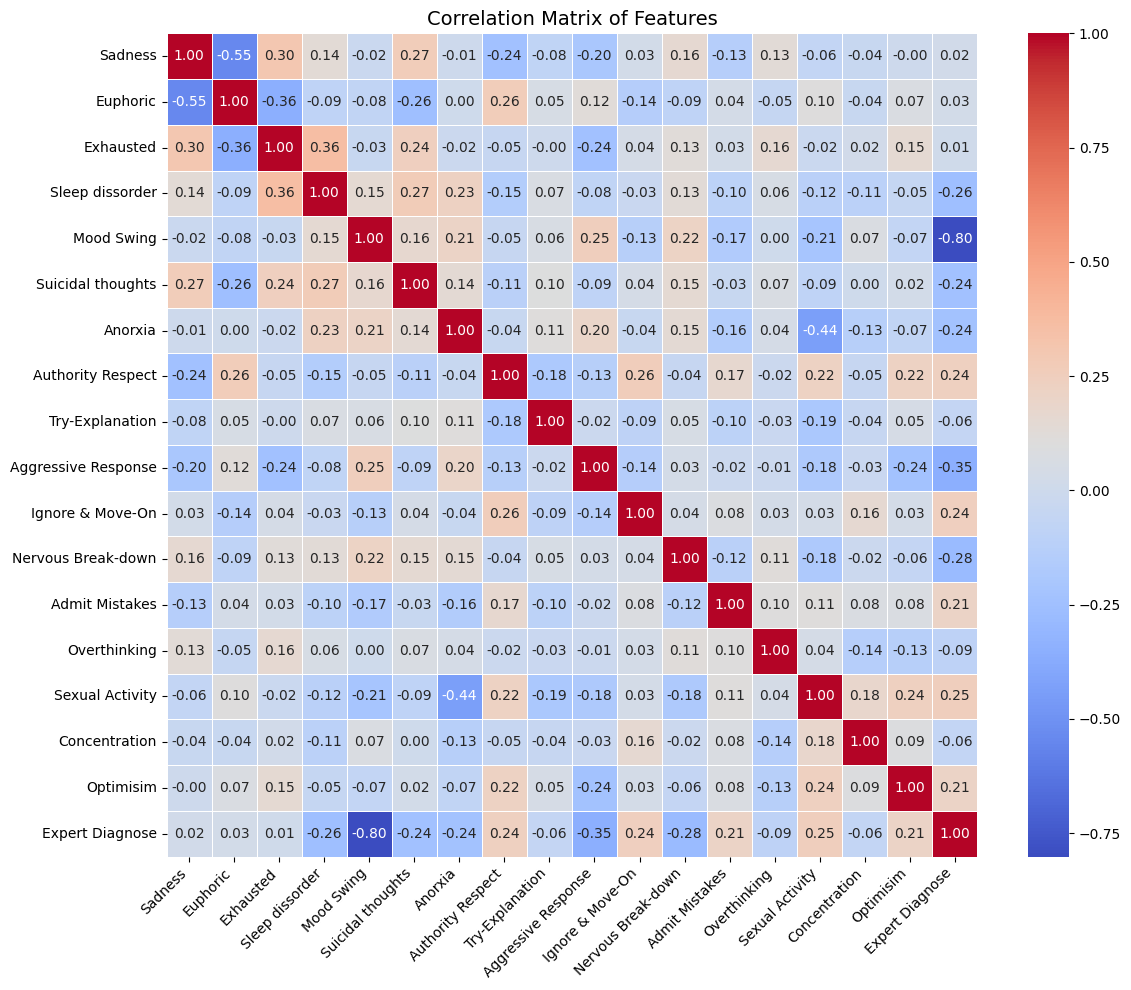

Correlation matrix heatmap generated.


In [ ]:
corr_matrix = X.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Correlation matrix heatmap generated.")

### Standarisasi Dataset

In [ ]:
X_Standard = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
display(X_Standard.iloc[:, 0:10].head())
display(X_Standard.iloc[:, 9:].head())

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response
0,0.488813,-1.014999,-0.623370,-0.470670,1.051315,1.051315,-0.788430,-0.802394,1.051315,-0.967204
1,0.488813,-1.014999,0.360898,-0.470670,-0.951190,1.051315,-0.788430,-0.802394,-0.951190,-0.967204
2,-0.597438,2.247498,-0.623370,-0.470670,1.051315,-0.951190,-0.788430,-0.802394,1.051315,1.033908
3,0.488813,-1.014999,0.360898,1.583164,1.051315,1.051315,1.268344,-0.802394,1.051315,-0.967204
4,0.488813,1.159999,-0.623370,-0.470670,-0.951190,-0.951190,-0.788430,-0.802394,-0.951190,-0.967204


,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,-0.967204,-0.845154,0.967204,1.016808,0.919866,-0.313112,-0.523404,0.894957,-0.476086
1,-0.967204,-0.845154,-1.033908,-0.983470,-1.087115,0.939336,-0.523404,0.894957,0.430744
2,1.033908,-0.845154,0.967204,1.016808,-1.087115,0.939336,0.841997,-1.858757,-1.382915
3,-0.967204,-0.845154,-1.033908,-0.983470,-1.087115,-0.313112,-0.523404,-0.481900,-0.476086
4,-0.967204,-0.845154,0.967204,1.016808,0.919866,0.939336,0.841997,0.894957,1.337574


## PROSES K-FOLD CROSS-VALIDATION ##

### Pembagian Data untuk Pelatihan, Validasi, dan Pengujian

Untuk memastikan evaluasi model yang tidak bias dan mengatasi ukuran dataset yang kecil, kita akan membagi data menjadi dua bagian utama:

1.  **Training/Validation Set (100 sampel):** Bagian ini akan digunakan untuk proses *K-Fold Cross-Validation*. Model akan dilatih dan divalidasi berkali-kali menggunakan subset dari data ini.
2.  **Test Set (20 sampel):** Bagian ini adalah *hold-out set* yang tidak akan pernah 'dilihat' oleh model selama pelatihan dan validasi. Ini akan digunakan untuk evaluasi akhir model terbaik yang dipilih setelah proses K-Fold.

Pembagian dilakukan dengan `train_test_split` dan `stratify=y` untuk menjaga proporsi kelas di setiap set, penting untuk dataset klasifikasi.

In [ ]:
X = X_Standard.drop(columns=["Expert Diagnose"])
y = df['Expert Diagnose']
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print(f"Ukuran X_train_val: {X_train_val.shape}")
print(f"Ukuran X_test: {X_test.shape}")

print("\nDistribusi kelas di y_train_val:")
print(y_train_val.value_counts(normalize=True))
print("\nDistribusi kelas di y_test:")
print(y_test.value_counts(normalize=True))

Ukuran X_train_val: (96, 17)
Ukuran X_test: (24, 17)

Distribusi kelas di y_train_val:
Expert Diagnose
Depression        0.260417
Bipolar Type-2    0.260417
Normal            0.250000
Bipolar Type-1    0.229167
Name: proportion, dtype: float64

Distribusi kelas di y_test:
Expert Diagnose
Depression        0.25
Normal            0.25
Bipolar Type-2    0.25
Bipolar Type-1    0.25
Name: proportion, dtype: float64


### K-Fold Cross-Validation

Sekarang, proses K-Fold Cross-Validation akan diaplikasikan hanya pada `X_train_val` dan `y_train_val`. Ini memastikan bahwa model dilatih dan divalidasi hanya pada bagian data yang telah ditentukan, dan set pengujian (`X_test`, `y_test`) tetap benar-benar tidak terlihat sampai evaluasi akhir.

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_splits = 4
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svc_model = SVC(random_state=42, probability=True)
gnb_model = GaussianNB()

models = {
    'Decision Tree': dt_model,
    'K-Nearest Neighbors': knn_model,
    'Support Vector Classifier': svc_model,
    'Gaussian Naive Bayes': gnb_model
}

model_accuracies = {
    'Decision Tree': [],
    'K-Nearest Neighbors': [],
    'Support Vector Classifier': [],
    'Gaussian Naive Bayes': []
}

model_roc_aucs = {
    'Decision Tree': [],
    'K-Nearest Neighbors': [],
    'Support Vector Classifier': [],
    'Gaussian Naive Bayes': []
}

print("Inisiasi K-Fold dan Model Selesai")

# Loop K-Fold
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    print(f"\n--- FOLD {fold + 1}/{n_splits} ---")

    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    X_train_fold_scaled = pd.DataFrame(X_train_fold_scaled, columns=X.columns, index=X_train_fold.index)
    X_val_fold_scaled = pd.DataFrame(X_val_fold_scaled, columns=X.columns, index=X_val_fold.index)

    for name, model in models.items():
        print(f"\n--- Model: {name} ---")

        model.fit(X_train_fold_scaled, y_train_fold)
        y_pred_fold = model.predict(X_val_fold_scaled)
        fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)

        y_pred_proba_fold = model.predict_proba(X_val_fold_scaled)
        fold_roc_auc = roc_auc_score(y_val_fold, y_pred_proba_fold, multi_class='ovr', average='weighted')

        model_accuracies[name].append(fold_accuracy)
        model_roc_aucs[name].append(fold_roc_auc)

        print(f"Accuracy for {name} (Fold {fold + 1}): {fold_accuracy:.4f}")
        print(f"ROC AUC for {name} (Fold {fold + 1}): {fold_roc_auc:.4f}")
        print(f"\nClassification Report for {name} (Fold {fold + 1}):")
        print(classification_report(y_val_fold, y_pred_fold))
        print(f"\nConfusion Matrix for {name} (Fold {fold + 1}):")
        print(confusion_matrix(y_val_fold, y_pred_fold))

Inisiasi K-Fold dan Model Selesai

--- FOLD 1/4 ---

--- Model: Decision Tree ---
Accuracy for Decision Tree (Fold 1): 0.7917
ROC AUC for Decision Tree (Fold 1): 0.8640

Classification Report for Decision Tree (Fold 1):
                precision    recall  f1-score   support

Bipolar Type-1       0.71      1.00      0.83         5
Bipolar Type-2       1.00      1.00      1.00         6
    Depression       1.00      0.29      0.44         7
        Normal       0.67      1.00      0.80         6

      accuracy                           0.79        24
     macro avg       0.85      0.82      0.77        24
  weighted avg       0.86      0.79      0.75        24


Confusion Matrix for Decision Tree (Fold 1):
[[5 0 0 0]
 [0 6 0 0]
 [2 0 2 3]
 [0 0 0 6]]

--- Model: K-Nearest Neighbors ---
Accuracy for K-Nearest Neighbors (Fold 1): 0.6667
ROC AUC for K-Nearest Neighbors (Fold 1): 0.8955

Classification Report for K-Nearest Neighbors (Fold 1):
                precision    recall  f1-score 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


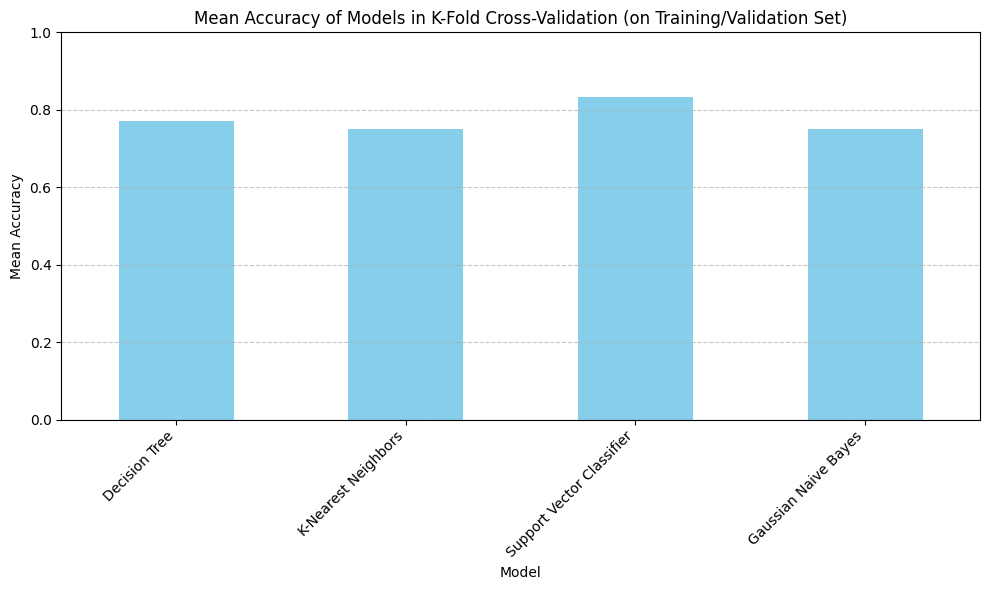

Bar plot showing mean accuracies generated.

Aggregated Model Performance Metrics (on Training/Validation Set):
--- Decision Tree ---
Mean Accuracy: 0.7708 (Std: 0.0466)
Mean ROC AUC: 0.8475 (Std: 0.0308)


--- K-Nearest Neighbors ---
Mean Accuracy: 0.7500 (Std: 0.0589)
Mean ROC AUC: 0.9161 (Std: 0.0135)


--- Support Vector Classifier ---
Mean Accuracy: 0.8333 (Std: 0.0510)
Mean ROC AUC: 0.9668 (Std: 0.0141)


--- Gaussian Naive Bayes ---
Mean Accuracy: 0.7500 (Std: 0.0295)
Mean ROC AUC: 0.9714 (Std: 0.0152)




In [ ]:

mean_accuracies = {name: np.mean(accuracies) for name, accuracies in model_accuracies.items()}
std_accuracies = {name: np.std(accuracies) for name, accuracies in model_accuracies.items()}

mean_roc_aucs = {name: np.mean(roc_aucs) for name, roc_aucs in model_roc_aucs.items()}
std_roc_aucs = {name: np.std(roc_aucs) for name, roc_aucs in model_roc_aucs.items()}

mean_accuracies_series = pd.Series(mean_accuracies)

plt.figure(figsize=(10, 6))
mean_accuracies_series.plot(kind='bar', color='skyblue')
plt.title('Mean Accuracy of Models in K-Fold Cross-Validation (on Training/Validation Set)')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar plot showing mean accuracies generated.")

print("\nAggregated Model Performance Metrics (on Training/Validation Set):")
for name in models.keys():
    print(f"--- {name} ---")
    print(f"Mean Accuracy: {mean_accuracies[name]:.4f} (Std: {std_accuracies[name]:.4f})")
    print(f"Mean ROC AUC: {mean_roc_aucs[name]:.4f} (Std: {std_roc_aucs[name]:.4f})")
    print("\n")

### Evaluasi Model Terbaik pada Test Set


In [ ]:
best_model_name = max(mean_accuracies, key=mean_accuracies.get)
best_model = models[best_model_name]

print(f"Model terbaik berdasarkan K-Fold Cross-Validation adalah: {best_model_name}")

final_scaler = StandardScaler()
X_train_val_scaled = final_scaler.fit_transform(X_train_val)
X_test_scaled = final_scaler.transform(X_test)

if best_model_name == 'Decision Tree':
    final_model = DecisionTreeClassifier(random_state=42)
elif best_model_name == 'K-Nearest Neighbors':
    final_model = KNeighborsClassifier(n_neighbors=5)
elif best_model_name == 'Support Vector Classifier':
    final_model = SVC(random_state=42, probability=True)
elif best_model_name == 'Gaussian Naive Bayes':
    final_model = GaussianNB()

final_model.fit(X_train_val_scaled, y_train_val)
y_pred_test = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')

print(f"\nKinerja Model Terbaik ({best_model_name}) pada Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Model terbaik berdasarkan K-Fold Cross-Validation adalah: Support Vector Classifier

Kinerja Model Terbaik (Support Vector Classifier) pada Test Set:
Accuracy: 0.9167
ROC AUC: 0.9931

Classification Report:
                precision    recall  f1-score   support

Bipolar Type-1       0.86      1.00      0.92         6
Bipolar Type-2       1.00      1.00      1.00         6
    Depression       0.86      1.00      0.92         6
        Normal       1.00      0.67      0.80         6

      accuracy                           0.92        24
     macro avg       0.93      0.92      0.91        24
  weighted avg       0.93      0.92      0.91        24


Confusion Matrix:
[[6 0 0 0]
 [0 6 0 0]
 [0 0 6 0]
 [1 0 1 4]]
